In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sns


In [143]:
df=pd.read_csv('/Users/syo/Desktop/spaceship-titanic/train.csv')
df.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [144]:
print(df.shape)
df.info

(8693, 14)


<bound method DataFrame.info of      PassengerId HomePlanet CryoSleep     Cabin    Destination   Age    VIP  \
0        0001_01     Europa     False     B/0/P    TRAPPIST-1e  39.0  False   
1        0002_01      Earth     False     F/0/S    TRAPPIST-1e  24.0  False   
2        0003_01     Europa     False     A/0/S    TRAPPIST-1e  58.0   True   
3        0003_02     Europa     False     A/0/S    TRAPPIST-1e  33.0  False   
4        0004_01      Earth     False     F/1/S    TRAPPIST-1e  16.0  False   
...          ...        ...       ...       ...            ...   ...    ...   
8688     9276_01     Europa     False    A/98/P    55 Cancri e  41.0   True   
8689     9278_01      Earth      True  G/1499/S  PSO J318.5-22  18.0  False   
8690     9279_01      Earth     False  G/1500/S    TRAPPIST-1e  26.0  False   
8691     9280_01     Europa     False   E/608/S    55 Cancri e  32.0  False   
8692     9280_02     Europa     False   E/608/S    TRAPPIST-1e  44.0  False   

      RoomService  

In [145]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [146]:
df.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [147]:
df['HomePlanet']=df['HomePlanet'].fillna(0)
# 将母星所有的缺失值映射为0
destination_dict={}
# 创建一个空的字典
destinations=list(set(list(df['HomePlanet'])))
# 去重复，创建目的地的列表
for i in range(1,len(destinations)):
    destination_dict[destinations[i]] = i
# 目的地为key，数字作为value
# 创建一个字典，遍历目的地的所有唯一的值，并将目的地作为key，目的地的index作为value存入字典
df['HomePlanet']=df['HomePlanet'].apply(lambda x:destination_dict[x]if x in destination_dict.keys() else 0)
# 将df母星所有的值映射为index，如果不存在则映射为0

In [148]:
df[["Cabin_deck", "Cabin_num", "Cabin_side"]] = df["Cabin"].str.split("/", expand=True)
df[['Cabin_side','Cabin_num','Cabin_deck']] = df[['Cabin_side','Cabin_num','Cabin_deck']].fillna(0)
df['Cabin_side'] = df['Cabin_side'].apply(lambda x: 1 if x=='P' else (2 if x=='S' else 0))
# 拆分Cabin为三列，并同样的处理映射为数字

In [149]:
df[['CryoSleep','VIP']] = df[['CryoSleep','VIP']].fillna(0)
df['CryoSleep']=df['CryoSleep'].apply(lambda x: 1 if x==True else (2 if x==False else 0))
df['VIP']=df['VIP'].apply(lambda x: 1 if x==True else (2 if x==False else 0))
df['Transported']=df['Transported'].astype(int)

In [150]:
df['Destination'] = df['Destination'].fillna(0)
destination_dict = {}
destinations = list(set(list(df['Destination'])))
for i in range(1,len(destinations)):
    destination_dict[destinations[i]] = i

df['Destination'] = df['Destination'].apply(lambda x: destination_dict[x] if x in destination_dict.keys() else 0)

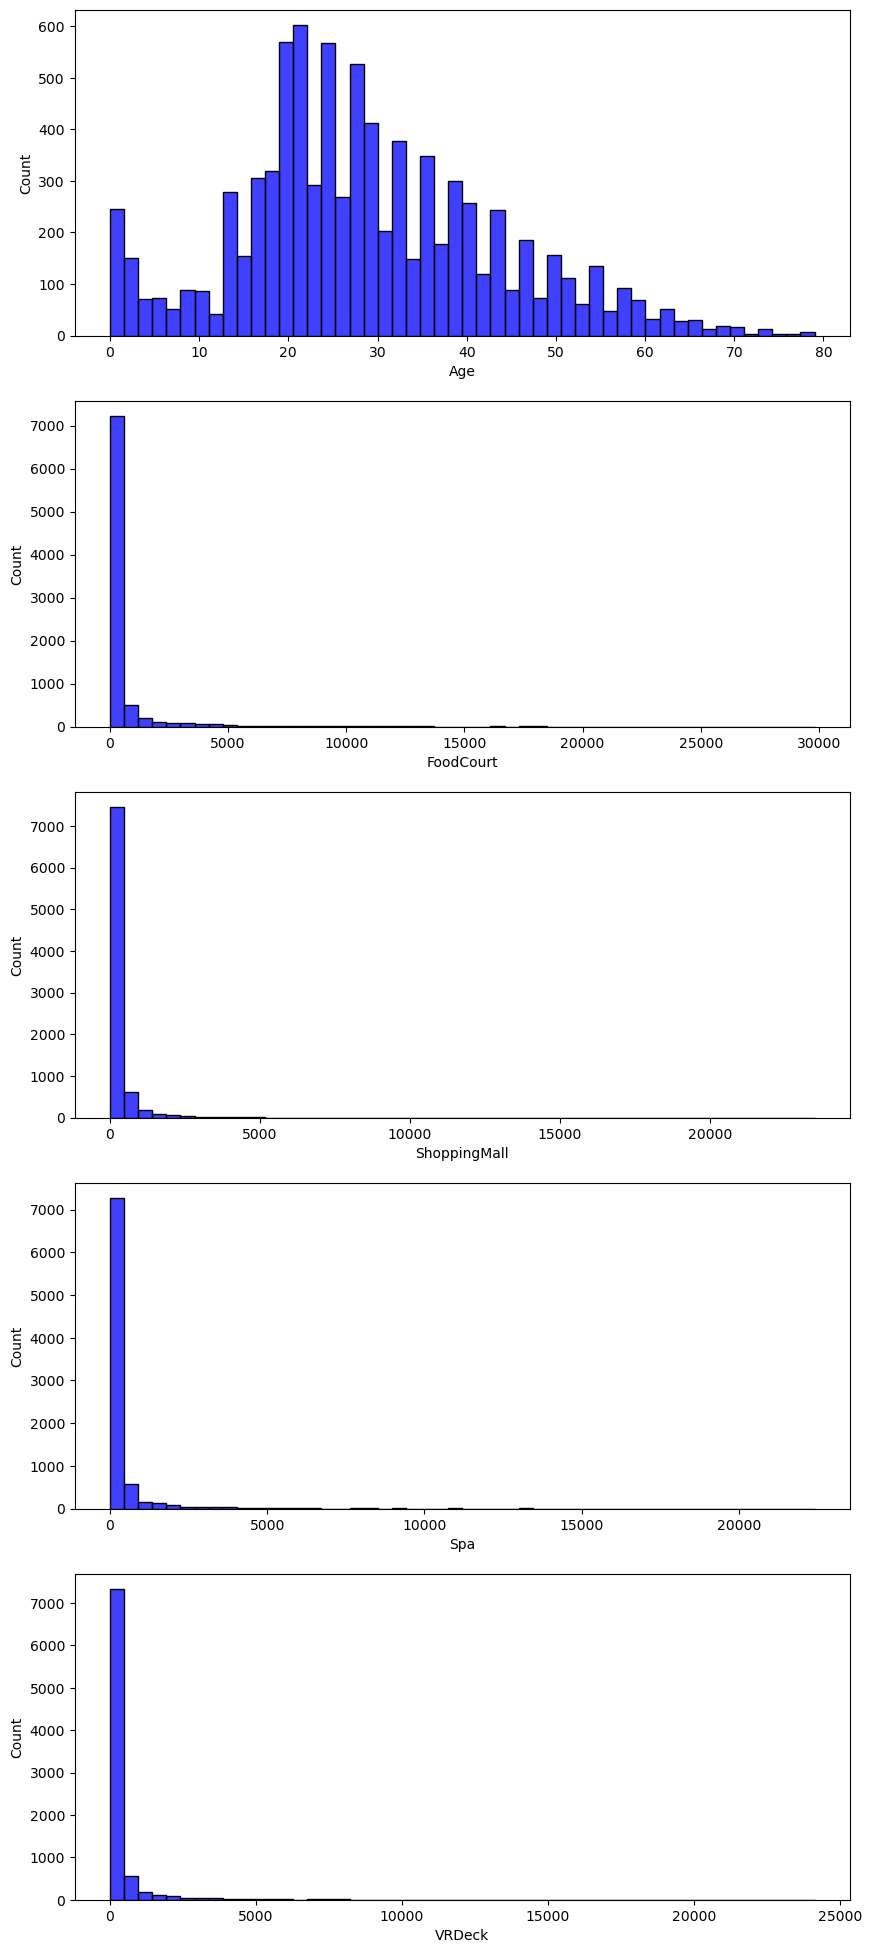

In [151]:
fig, ax = plt.subplots(5,1,  figsize=(10, 10))
plt.subplots_adjust(top = 2)

sns.histplot(df['Age'], color='b', bins=50, ax=ax[0]);
sns.histplot(df['FoodCourt'], color='b', bins=50, ax=ax[1]);
sns.histplot(df['ShoppingMall'], color='b', bins=50, ax=ax[2]);
sns.histplot(df['Spa'], color='b', bins=50, ax=ax[3]);
sns.histplot(df['VRDeck'], color='b', bins=50, ax=ax[4]);

In [152]:
df[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']] = df[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']].fillna(0)
df['Age'].fillna(int(df['Age'].mean()), inplace=True)

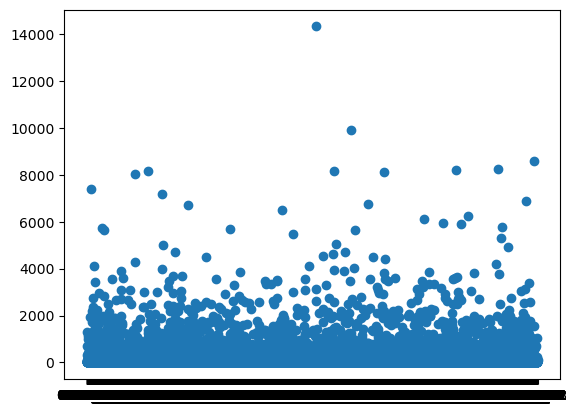

In [153]:
plt.scatter(df['PassengerId'],df['RoomService'])

In [154]:
df = df.drop(df[df.RoomService > 8200].index)

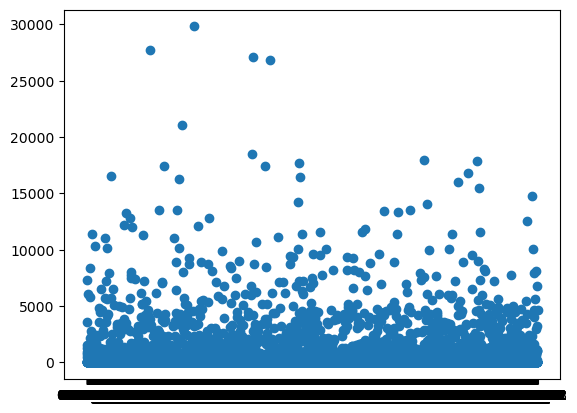

In [155]:
plt.scatter(df['PassengerId'],df['FoodCourt'])

In [156]:
df = df.drop(df[df.FoodCourt > 20000].index)

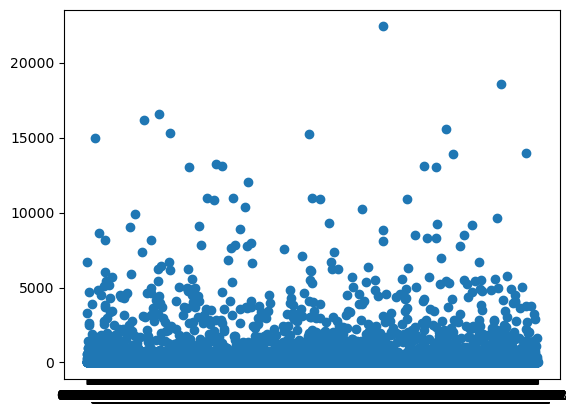

In [157]:
plt.scatter(df['PassengerId'],df['Spa'])

In [158]:
df = df.drop(df[df.Spa > 17000].index)

In [159]:
deck_dict = {}
decks = list(set(list(df['Cabin_deck'])))
for i in range(1,len(decks)):
    deck_dict[decks[i]] = i

df['Cabin_deck'] = df['Cabin_deck'].apply(lambda x: deck_dict[x] if x in deck_dict.keys() else 0)

In [160]:
X = df[['Age','CryoSleep','HomePlanet','Cabin_deck','Cabin_num','Cabin_side','Destination','VIP','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']]
Y = df[['Transported']]
X = np.array(X).reshape(len(X),13)
Y = np.array(Y).reshape(len(Y),1)

In [161]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

In [162]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

pr = PolynomialFeatures()
ploy_rep_x = pr.fit_transform(X_train)
lr = LinearRegression()
lr.fit(ploy_rep_x, y_train)

ploy_rep_tx = pr.fit_transform(X_test)
y_pred = lr.predict(ploy_rep_tx)

In [163]:
def array_to_list(arr):
    lst = []
    for i in range(0,len(arr)):
        lst.append(round(arr[i][0]))
    return lst

y_pred = array_to_list(y_pred)
accuracy_score(y_test, y_pred)

0.795048934945308

In [164]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth=14, random_state=0)
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)
accuracy_score(y_test, y_pred)

/Users/syo/miniconda3/envs/pytorch/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


0.8048359240069085

In [165]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.2,max_depth=11, random_state=0).fit(X_train, y_train)
clf.score(X_test, y_test)

/Users/syo/miniconda3/envs/pytorch/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7979274611398963

In [166]:
df_test = pd.read_csv('/Users/syo/Desktop/spaceship-titanic/test.csv')
df_test.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [167]:
df_test['HomePlanet'] = df_test['HomePlanet'].fillna(0)
destination_dict = {}
destinations = list(set(list(df_test['HomePlanet'])))
for i in range(1,len(destinations)):
    destination_dict[destinations[i]] = i

df_test['HomePlanet'] = df_test['HomePlanet'].apply(lambda x: destination_dict[x] if x in destination_dict.keys() else 0)

df_test[["Cabin_deck", "Cabin_num", "Cabin_side"]] = df_test["Cabin"].str.split("/", expand=True)
df_test[['Cabin_side','Cabin_num','Cabin_deck']] = df_test[['Cabin_side','Cabin_num','Cabin_deck']].fillna(0)

df_test['Cabin_side'] = df_test['Cabin_side'].apply(lambda x: 1 if x=='P' else (2 if x=='S' else 0))
df_test[['CryoSleep','VIP']] = df_test[['CryoSleep','VIP']].fillna(0)

df_test['CryoSleep']=df_test['CryoSleep'].apply(lambda x: 1 if x==True else (2 if x==False else 0))
df_test['VIP']=df_test['VIP'].apply(lambda x: 1 if x==True else (2 if x==False else 0))

df_test['Destination'] = df_test['Destination'].fillna(0)
destination_dict = {}
destinations = list(set(list(df_test['Destination'])))
for i in range(1,len(destinations)):
    destination_dict[destinations[i]] = i

df_test['Destination'] = df_test['Destination'].apply(lambda x: destination_dict[x] if x in destination_dict.keys() else 0)
df_test[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']] = df_test[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']].fillna(0)

df_test['Age'].fillna(int(df_test['Age'].mean()), inplace=True)
deck_dict = {}
decks = list(set(list(df_test['Cabin_deck'])))
for i in range(1,len(decks)):
    deck_dict[decks[i]] = i

df_test['Cabin_deck'] = df_test['Cabin_deck'].apply(lambda x: deck_dict[x] if x in deck_dict.keys() else 0)
X = df_test[['Age','CryoSleep','HomePlanet','Cabin_deck','Cabin_num','Cabin_side','Destination','VIP','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']]
X_test = np.array(X).reshape(len(X),13)

In [168]:
y_pred = rfc.predict(X_test)
y_pred = [True if x==1 else False for x in y_pred]

In [169]:
submission_df = pd.read_csv('/Users/syo/Desktop/spaceship-titanic/sample_submission.csv')
submission_df['Transported'] = y_pred
submission_df.to_csv('/Users/syo/Desktop/spaceship-titanic/submission', index=False)